# Project 7: Machine learning project based on predictive learning
### Mahesh Bashyal 08/07/2025

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

# Part 1 - Chart a Straight line

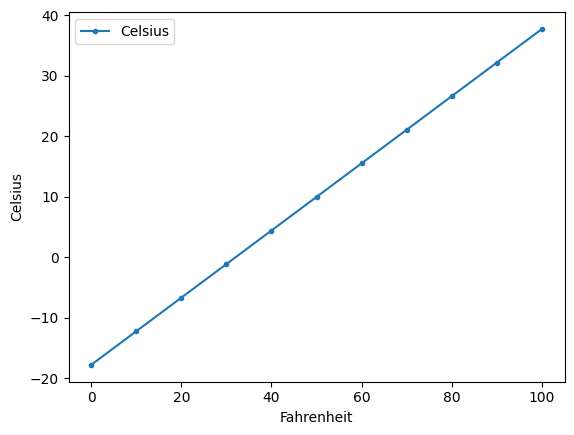

In [ ]:
# Understanding the general concept of a linear relationship using this example
c = lambda f: 5 / 9 * (f - 32)

temps = [(f, c(f)) for f in range(0, 101, 10)]

# This will plot a graph showing Celsius vs Farenheit
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

# Part 2 - Prediction 
## Section 1 - Data Acquisition


In [ ]:
# Load the New York City data
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')


# Section 2 - Data Inspection


In [ ]:
# View head 
nyc.head()

#View Tail 
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


# Section 3 - Data Cleaning

In [5]:
# Rename columns
nyc.columns = ['Date', 'Temperature', 'Anomaly']
# Check
nyc.head(3)

# Remove 01 (January) from labels'
nyc.Date = nyc.Date.floordiv(100)
# Check
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


# Section 4 - Descriptive Statistics

In [ ]:
# Calculating basic descriptive statistics for the dataset
pd.set_option('display.precision',2)

nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

# Section 5 - Build the Model

In [7]:
linear_regression = stats.linregress(x=nyc.Date,
                                     y=nyc.Temperature)

linear_regression.slope
linear_regression.intercept

linear_regression.slope * 2019 + linear_regression.intercept

np.float64(38.51837136113297)

# Section 6 - Predict

In [ ]:
# Forecasting future January average high temperatures
linear_regression = stats.linregress(x=nyc.Date,
                                     y=nyc.Temperature)

linear_regression.slope
linear_regression.intercept

linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

# Section 7 - Visualizations

(10.0, 70.0)

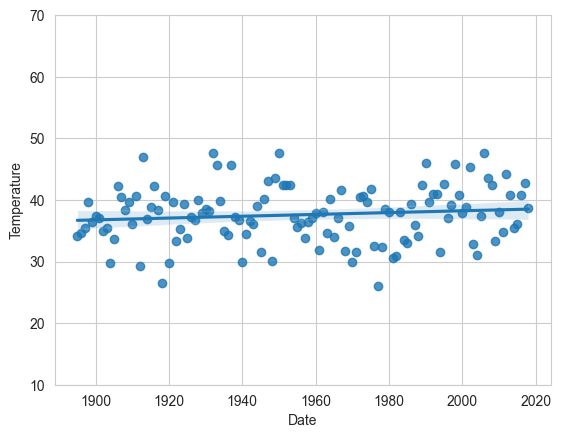

In [ ]:
# Plotting the average high temperatures and a regression line
# Regplot function creates the scatter plot or scattergram below
# Blue dots represent Temperature and the straight line is the regression line
sns.set_style('whitegrid')

axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

axes.set_ylim(10, 70)

# Part 3 - Prediction
### Section 1 - Build the Model

In [ ]:
# Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(
     nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, 
     random_state=11)

X_train.shape

(93, 1)

In [11]:
X_test.shape

(31, 1)

In [ ]:
# Training the model

from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
linear_regression.coef_

array([0.01939167])

In [14]:
linear_regression.intercept_

np.float64(-0.30779820252658396)

### Section 2 - Test the Model

In [15]:
predicted = linear_regression.predict(X_test)

expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict

In [28]:
# Predicting future average high temperature in January 2024
predict = (lambda x: linear_regression.coef_ * x + 
                      linear_regression.intercept_)

predict(2024)

array([38.94094855])

### Section 4 - Visualization

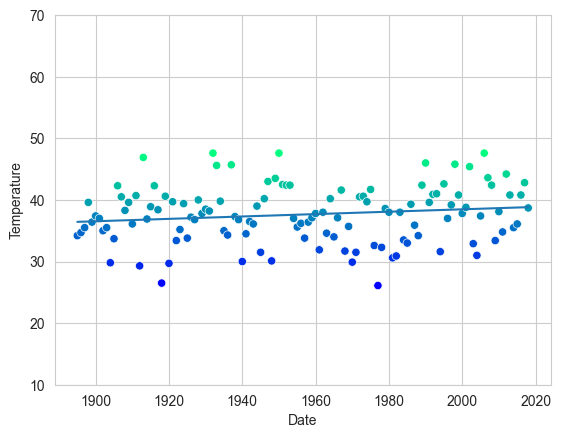

In [29]:
#visualizing the dataset with the regression line
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
     hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)

import numpy as np

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

import matplotlib.pyplot as plt 

line = plt.plot(x, y)

# Part 4 - Insights

# Comparing the methods used in this project
#### The first portion of the exercise involved the use of celsius and fahrenheit temperature data to understand the concept of linear relationship. 
#### The first model used to predict future average high temperature in New York city for the month of January was performed using linregress function. The second model used to predict future average high temperature in New York city using LinearRegression estimator form Sklearn.linear_model. In the second method, we split the data to training and testing data.

# My observations based on the project

#### The value predicted for the month of January for 2024 was similar for both methods. It was slightly larger (38.94) in the second method vs the first method (38.59)

#### Based on my understanding of linear regression, linear regression is robust when predicting within the bounds of the data (in this case 1895-2020) and the error increases when we are extrapolating beyond the dataset provided. In my opinion, we should be cautious when we are extrapolating the data beyond the data points. 